In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
song_data = pd.read_csv("song_data.csv")

In [4]:
song_data.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


We can see through the number of unique values that there are duplicated songs in the dataset ($18335$ rows, but only $13070$ songs), so we need to  deduplicate the data first in data preprocessing. 

In [5]:
song_data.nunique().sort_values()

audio_mode              2
time_signature          5
key                    12
song_popularity       101
danceability          849
energy               1132
speechiness          1224
audio_valence        1246
liveness             1425
acousticness         3209
instrumentalness     3925
loudness             8416
song_duration_ms    11771
tempo               12112
song_name           13070
dtype: int64

# Data preprocessing

We first drop duplicated rows, and then drop the column of song names, as they are not suitble features (strings) for our purpose of data analysis.

Here we notice that there are $14926$ songs remaining, while there are $13070$ songs. This may indicate different songs with the same name, so we may keep all of them.

In [6]:
def preprocess_data(file_path):
    """
    Preprocess the song data from a CSV file.
    This function reads song data from a CSV file, removes duplicate rows,
    and drops the 'song_name' column. It then identifies the features to be
    plotted against 'song_popularity'.
    Parameters:
    file_path (str): The path to the CSV file containing the song data.
    Returns:
    tuple: A tuple containing:
        - song_data (DataFrame): The preprocessed song data.
        - features (Index): The features to plot against 'song_popularity'.
    """

    song_data = pd.read_csv(file_path)
    song_data = song_data.drop_duplicates().drop(columns=['song_name'])
    features = song_data.columns.drop('song_popularity')

    return song_data, features

def plot_features_popularity(song_data, features):
    """
    Create scatter plots for each feature against 'song_popularity'.
    Parameters:
    song_data (DataFrame): A pandas DataFrame containing song data, including the features and 'song_popularity'.
    features (list): A list of feature names (strings) to plot against 'song_popularity'.
    Returns:
    None: This function does not return anything. It displays scatter plots.
    """
    plt.figure(figsize=(8, 24))
    for i, feature in enumerate(features, 1):
        plt.subplot(7, 2, i)  # Create grid of subplots
        plt.scatter(song_data[feature], song_data['song_popularity'], alpha=0.5, s=1)
        plt.title(f'{feature} vs song popularity')
        plt.xlabel(feature)
        plt.ylabel('Song Popularity')
        plt.tight_layout()

    plt.show()

   song_popularity  song_duration_ms  acousticness  danceability  energy  \
0               73            262333      0.005520         0.496   0.682   
1               66            216933      0.010300         0.542   0.853   
2               76            231733      0.008170         0.737   0.463   
3               74            216933      0.026400         0.451   0.970   
4               56            223826      0.000954         0.447   0.766   

   instrumentalness  key  liveness  loudness  audio_mode  speechiness  \
0          0.000029    8    0.0589    -4.095           1       0.0294   
1          0.000000    3    0.1080    -6.407           0       0.0498   
2          0.447000    0    0.2550    -7.828           1       0.0792   
3          0.003550    0    0.1020    -4.938           1       0.1070   
4          0.000000   10    0.1130    -5.065           1       0.0313   

     tempo  time_signature  audio_valence  
0  167.060               4          0.474  
1  105.256      

/var/folders/xj/0mzzfw7d6t7__v00t18jd8nw0000gp/T/ipykernel_33474/1185755393.py:37: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


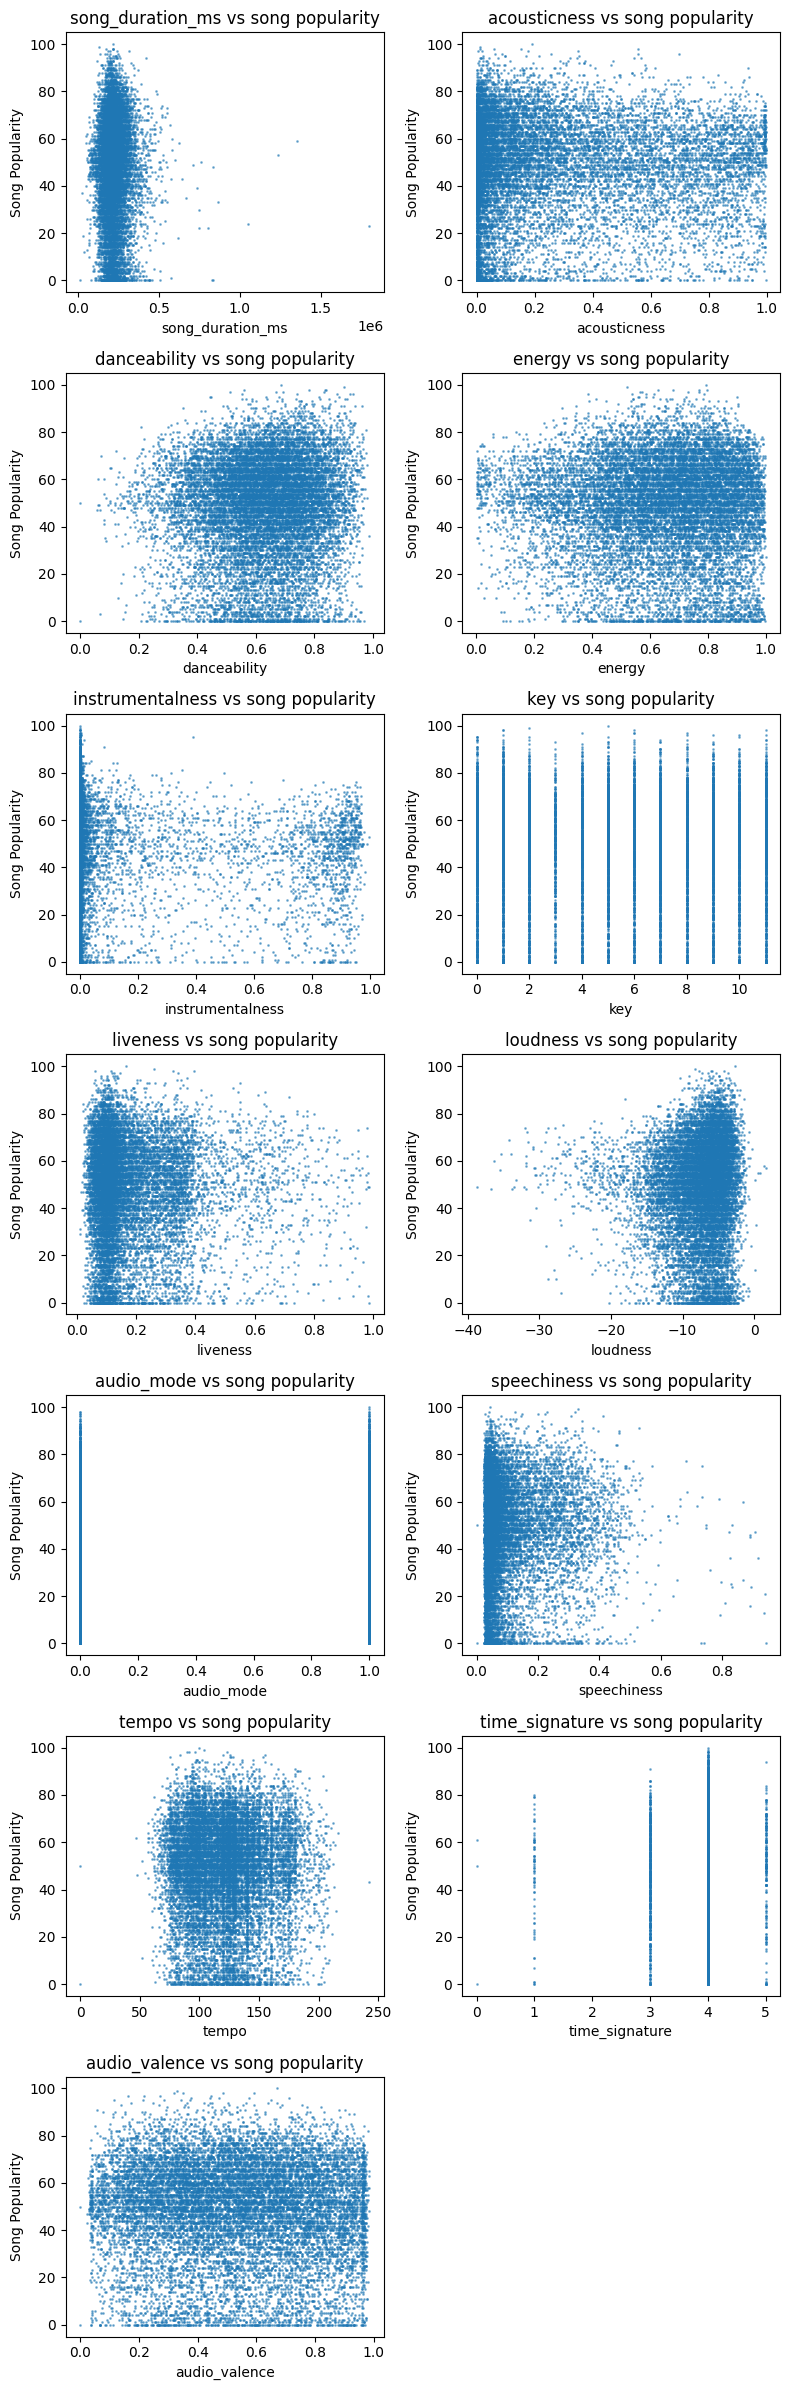

In [7]:
# Preprocess the data
song_data, features = preprocess_data("song_data.csv")
print(song_data.head())

# Plot the features against song popularity
plot_features_popularity(song_data, features)


## Handling missing data

We can see through below that there is no missing value in all features and outcome. This means that we are free from handling missing valies.

In [8]:
song_data.isna().sum()

song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

## One-hot encoding

Notice that the features key, audio mode, and time signiture are categorical, meaning that the relevant magnitude of the features has no meaning to our model.

Based on the encoding result, at most one of the encoded column for each feature could be $1$. If all the columns corresponding to a column is $0$, then it means that the corresponding one-hot-encoded feature has value $0$.

In [9]:
def one_hot_encode(song_data, categorical_features):
    """
    Perform one-hot encoding on the specified categorical features of the song data.
    Parameters:
    song_data (pd.DataFrame): The input DataFrame containing song data.
    categorical_features (list of str): A list of column names in song_data to be one-hot encoded.
    Returns:
    tuple: A tuple containing:
        - pd.DataFrame: The DataFrame with one-hot encoded features.
        - pd.Index: The index of the columns in the DataFrame after one-hot encoding, excluding 'song_popularity'.
    """
    # Perform one-hot encoding on the categorical features
    song_data_encoded = pd.get_dummies(song_data, columns=categorical_features, drop_first=True)
    # Display the columns after one-hot encoding
    features = song_data_encoded.columns.drop("song_popularity")
    return song_data_encoded, features

In [10]:
song_data_raw = song_data
# Features to one-hot encode
categorical_features = ['key', 'audio_mode', 'time_signature']
# Perform one-hot encoding
song_data, features = one_hot_encode(song_data_raw, categorical_features)

In [11]:
# Save the DataFrame to a CSV file
song_data.to_csv('song_data_processed.csv', index=False)


In [12]:
print(song_data.head(10), features)

   song_popularity  song_duration_ms  acousticness  danceability  energy  \
0               73            262333      0.005520         0.496   0.682   
1               66            216933      0.010300         0.542   0.853   
2               76            231733      0.008170         0.737   0.463   
3               74            216933      0.026400         0.451   0.970   
4               56            223826      0.000954         0.447   0.766   
5               80            235893      0.008950         0.316   0.945   
6               81            199893      0.000504         0.581   0.887   
7               76            213800      0.001480         0.613   0.953   
8               80            222586      0.001080         0.330   0.936   
9               81            203346      0.001720         0.542   0.905   

   instrumentalness  liveness  loudness  speechiness    tempo  ...  key_7  \
0          0.000029    0.0589    -4.095       0.0294  167.060  ...  False   
1        